Download data and Import Libraries

In [1]:
import support_func
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# This cell should be moved after CELL INDEX: 1
raw_data, FEATURE_COL, TARGET_COL = support_func.get_data_and_features()

EDA

In [ ]:
raw_data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [ ]:
raw_data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
print('Feature values')
for features in raw_data.columns:
    print(f'{features}: {len(raw_data.loc[:, features].value_counts().index)}')

Feature values
Diabetes_binary: 2
HighBP: 2
HighChol: 2
CholCheck: 2
BMI: 80
Smoker: 2
Stroke: 2
HeartDiseaseorAttack: 2
PhysActivity: 2
Fruits: 2
Veggies: 2
HvyAlcoholConsump: 2
AnyHealthcare: 2
NoDocbcCost: 2
GenHlth: 5
MentHlth: 31
PhysHlth: 31
DiffWalk: 2
Sex: 2
Age: 13
Education: 6
Income: 8


In [ ]:
raw_data.loc[:, 'BMI'].value_counts().sort_index()

BMI
12.0     1
13.0     8
14.0     8
15.0    30
16.0    70
        ..
87.0    13
89.0     4
92.0     9
95.0     4
98.0     4
Name: count, Length: 80, dtype: int64

In [ ]:
raw_data.loc[:, 'Age'].value_counts().sort_index()

Age
1.0       979
2.0      1396
3.0      2049
4.0      2793
5.0      3520
6.0      4648
7.0      6872
8.0      8603
9.0     10112
10.0    10856
11.0     8044
12.0     5394
13.0     5426
Name: count, dtype: int64

In [ ]:
raw_data.loc[:, 'MentHlth'].value_counts().sort_index()

MentHlth
0.0     48091
1.0      2051
2.0      3267
3.0      1967
4.0       981
5.0      2519
6.0       288
7.0       825
8.0       198
9.0        28
10.0     1924
11.0        8
12.0      130
13.0       15
14.0      353
15.0     1767
16.0       28
17.0       18
18.0       42
19.0        7
20.0     1125
21.0       84
22.0       22
23.0       13
24.0       10
25.0      425
26.0       17
27.0       17
28.0       99
29.0       53
30.0     4320
Name: count, dtype: int64

In [ ]:
raw_data.loc[:, 'Education'].value_counts().sort_index()

Education
1.0       75
2.0     1647
3.0     3447
4.0    19473
5.0    20030
6.0    26020
Name: count, dtype: int64

In [ ]:
raw_data.loc[:, 'Income'].value_counts().sort_index()

Income
1.0     3611
2.0     4498
3.0     5557
4.0     6658
5.0     8010
6.0    10287
7.0    11425
8.0    20646
Name: count, dtype: int64

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(raw_data[FEATURE_COL], raw_data[TARGET_COL], random_state=69)

In [ ]:
X_train.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
A = X_train.sample(1000)

In [ ]:
A.cov()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HighBP,0.246021,0.074795,0.009264,0.862538,0.015506,0.021166,0.034284,-0.029399,-0.017708,-0.010666,...,0.008128,0.000150,0.170140,0.161156,0.793804,0.043053,0.006146,0.480475,-0.083969,-0.174945
HighChol,0.074795,0.250106,0.007832,0.559800,0.019572,0.008705,0.028228,-0.023399,-0.017530,-0.001946,...,0.007584,0.003924,0.132789,0.393970,0.640488,0.033081,-0.001329,0.241818,-0.036685,-0.083980
CholCheck,0.009264,0.007832,0.026297,0.037873,-0.001744,0.001811,0.003053,-0.004158,0.000903,-0.001753,...,0.001706,-0.001572,0.012286,-0.032453,0.123966,0.004647,-0.001013,0.076656,-0.008926,-0.001235
BMI,0.862538,0.559800,0.037873,46.330305,0.022352,0.136101,0.194444,-0.566857,-0.396126,-0.187823,...,-0.016977,0.072623,2.252743,6.972387,9.379550,0.727898,-0.084705,-1.035621,-0.610155,-1.670761
Smoker,0.015506,0.019572,-0.001744,0.022352,0.248132,0.001584,0.015916,-0.014907,-0.036240,-0.021319,...,0.003796,0.008148,0.044697,0.262304,0.304220,0.022338,0.023447,0.112154,-0.080847,-0.083816
Stroke,0.021166,0.008705,0.001811,0.136101,0.001584,0.062574,0.023974,-0.008775,-0.000943,-0.005735,...,0.001217,-0.002032,0.048294,0.094435,0.343662,0.021540,-0.002751,0.093434,-0.013256,-0.071157
HeartDiseaseorAttack,0.034284,0.028228,0.003053,0.194444,0.015916,0.023974,0.127628,-0.006707,0.002102,-0.001051,...,0.002202,0.003504,0.096797,0.076527,0.451552,0.032132,0.007407,0.261712,-0.049399,-0.138839
PhysActivity,-0.029399,-0.023399,-0.004158,-0.566857,-0.014907,-0.008775,-0.006707,0.211007,0.029081,0.025700,...,0.006511,-0.008829,-0.152829,-0.252999,-0.967475,-0.056765,0.031119,-0.190937,0.092651,0.246963
Fruits,-0.017708,-0.017530,0.000903,-0.396126,-0.036240,-0.000943,0.002102,0.029081,0.234358,0.047385,...,-0.000953,-0.009349,-0.052665,-0.257459,-0.187784,-0.011007,-0.010955,0.089888,0.078525,0.098190
Veggies,-0.010666,-0.001946,-0.001753,-0.187823,-0.021319,-0.005735,-0.001051,0.025700,0.047385,0.167799,...,0.002779,-0.004835,-0.047441,-0.123222,-0.168971,-0.025628,-0.000428,-0.019118,0.061939,0.129283


In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD()

svd.fit(A)

TruncatedSVD()

In [ ]:
svd.singular_values_

array([1069.50377027,  323.48533256])

In [ ]:
X_train_with_target = pd.concat([X_train, y_train], axis=1)

X_train_with_target

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
20060,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,4.0,7.0,0.0,0.0,0.0,9.0,6.0,7.0,0.0
46623,0.0,1.0,1.0,30.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,3.0,0.0,0.0,0.0,0.0,5.0,5.0,7.0,1.0
69447,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,11.0,4.0,6.0,1.0
22548,1.0,1.0,1.0,44.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,3.0,4.0,0.0,0.0,1.0,5.0,6.0,8.0,0.0
60404,0.0,0.0,1.0,26.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,4.0,0.0,30.0,1.0,0.0,13.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47508,1.0,1.0,1.0,37.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,4.0,5.0,30.0,1.0,0.0,10.0,5.0,2.0,1.0
25015,0.0,0.0,1.0,22.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,3.0,4.0,0.0,0.0,0.0,11.0,5.0,6.0,0.0
9818,0.0,0.0,1.0,33.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,4.0,30.0,0.0,0.0,1.0,6.0,5.0,7.0,0.0
69577,1.0,1.0,1.0,29.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,9.0,5.0,7.0,1.0


Text(0, 0.5, 'Count')

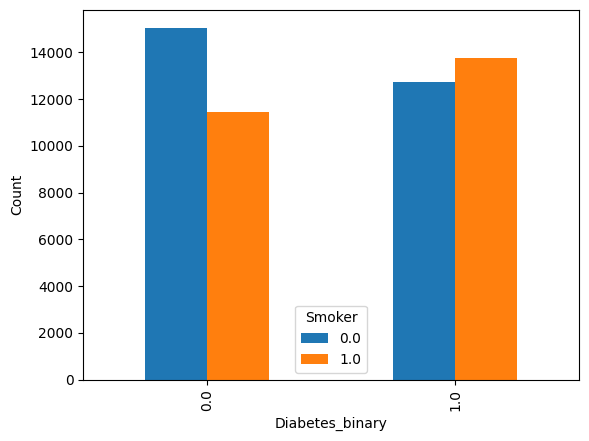

In [ ]:
pd.crosstab( X_train_with_target.Diabetes_binary, X_train_with_target.Smoker).plot(kind="bar")
plt.title('Number of smokers in with or without diabetes')
plt.ylabel('Count')

Models

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, recall_score, precision_score, make_scorer

scoring = {
    "Accuracy": make_scorer(accuracy_score), 
    "Recall": make_scorer(recall_score), 
    "Precision": make_scorer(precision_score)
}

k-NearestNeighbour

In [ ]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [1, 10, 50, 100, 500]}

grid = GridSearchCV(
    knn, 
    param_grid,
    scoring=scoring,
    refit="Accuracy", 
    verbose=3, 
    return_train_score=True,
    n_jobs=-1
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 5/5] END n_neighbors=10; Accuracy: (train=0.766, test=0.715) Precision: (train=0.776, test=0.723) Recall: (train=0.749, test=0.696) total time=   3.4s
[CV 2/5] END n_neighbors=10; Accuracy: (train=0.766, test=0.711) Precision: (train=0.774, test=0.715) Recall: (train=0.750, test=0.701) total time=   3.4s
[CV 5/5] END n_neighbors=1; Accuracy: (train=0.996, test=0.660) Precision: (train=0.996, test=0.658) Recall: (train=0.995, test=0.664) total time=   3.3s
[CV 3/5] END n_neighbors=10; Accuracy: (train=0.763, test=0.719) Precision: (train=0.773, test=0.727) Recall: (train=0.744, test=0.701) total time=   3.4s
[CV 1/5] END n_neighbors=1; Accuracy: (train=0.996, test=0.658) Precision: (train=0.996, test=0.659) Recall: (train=0.996, test=0.654) total time=   3.4s
[CV 4/5] END n_neighbors=10; Accuracy: (train=0.767, test=0.709) Precision: (train=0.776, test=0.715) Recall: (train=0.749, test=0.696) total time=   3.4s
[CV 4/5] END

In [ ]:
print(param_grid)
print(f'CV_mean_accuracy: {grid.cv_results_["mean_test_Accuracy"]}\n')
print(f'CV_mean_precision: {grid.cv_results_["mean_test_Precision"]}\n')
print(f'CV_mean_recall: {grid.cv_results_["mean_test_Recall"]}')

{'n_neighbors': [1, 10, 50, 100, 500]}
CV_mean_accuracy: [0.66044248 0.71455517 0.73134159 0.73183197 0.72181674]

CV_mean_precision: [0.65980202 0.72177568 0.71413836 0.71107075 0.69863099]

CV_mean_recall: [0.66121739 0.69757614 0.77078454 0.78026135 0.77935534]


In [ ]:
grid.best_params_

{'n_neighbors': 100}

In [ ]:
grid.best_score_

0.7318319712153094

In [ ]:
grid.best_index_

3

In [ ]:
y_pred = grid.predict(X_eval)

support_func.evaluate_prediction(y_pred, y_eval)

confusion matrix
[[5979 2834]
 [1933 6927]]
Report
              precision    recall  f1-score   support

         0.0       0.76      0.68      0.71      8813
         1.0       0.71      0.78      0.74      8860

    accuracy                           0.73     17673
   macro avg       0.73      0.73      0.73     17673
weighted avg       0.73      0.73      0.73     17673



Naive Bayes Classifier

In [ ]:
gauNB = GaussianNB()

cv = cross_validate(
    gauNB,
    X_train, 
    y_train,
    scoring=scoring
)

In [ ]:
cv['test_Accuracy'].mean(), cv['test_Precision'].mean(), cv['test_Recall'].mean()

(0.7201946610343123, 0.7252736926300976, 0.7081104192754818)

In [ ]:
y_pred = gauNB.fit(X_train, y_train).predict(X_eval)

support_func.evaluate_prediction(y_pred, y_eval)

confusion matrix
[[6372 2441]
 [2584 6276]]
Report


              precision    recall  f1-score   support

         0.0       0.71      0.72      0.72      8813
         1.0       0.72      0.71      0.71      8860

    accuracy                           0.72     17673
   macro avg       0.72      0.72      0.72     17673
weighted avg       0.72      0.72      0.72     17673



LDA

In [ ]:
lda = LinearDiscriminantAnalysis()

cv = cross_validate(
    lda,
    X_train,
    y_train,
    scoring=scoring
)

In [ ]:
cv['test_Accuracy'].mean(), cv['test_Precision'].mean(), cv['test_Recall'].mean()

(0.7493540258013281, 0.736127417473153, 0.7767501109804312)

In [ ]:
y_pred = lda.fit(X_train, y_train).predict(X_eval)

support_func.evaluate_prediction(y_pred, y_eval)

confusion matrix
[[6244 2569]
 [1989 6871]]
Report
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73      8813
         1.0       0.73      0.78      0.75      8860

    accuracy                           0.74     17673
   macro avg       0.74      0.74      0.74     17673
weighted avg       0.74      0.74      0.74     17673



In [ ]:
qda = QuadraticDiscriminantAnalysis()

cv = cross_validate(
    lda,
    X_train,
    y_train,
    scoring=scoring
)

In [ ]:
cv['test_Accuracy'].mean(), cv['test_Precision'].mean(), cv['test_Recall'].mean()

(0.7493540258013281, 0.736127417473153, 0.7767501109804312)

In [ ]:
y_pred = qda.fit(X_train, y_train).predict(X_eval)

support_func.evaluate_prediction(y_pred, y_eval)

confusion matrix
[[5848 2965]
 [1933 6927]]
Report
              precision    recall  f1-score   support

         0.0       0.75      0.66      0.70      8813
         1.0       0.70      0.78      0.74      8860

    accuracy                           0.72     17673
   macro avg       0.73      0.72      0.72     17673
weighted avg       0.73      0.72      0.72     17673

